<a href="https://colab.research.google.com/github/CMBM1313/IC/blob/main/Com_GIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a dimensão da matriz desejada: 250
Digite o número de frames do GIF: 500
Digite a diagonal inicial do quadradro: 75
Digite a diagonal final do quadradro: 125


<ipython-input-3-014a806ba3c9>:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f"frame_{i}.png"))


GIF saved as BabyV^2.gif


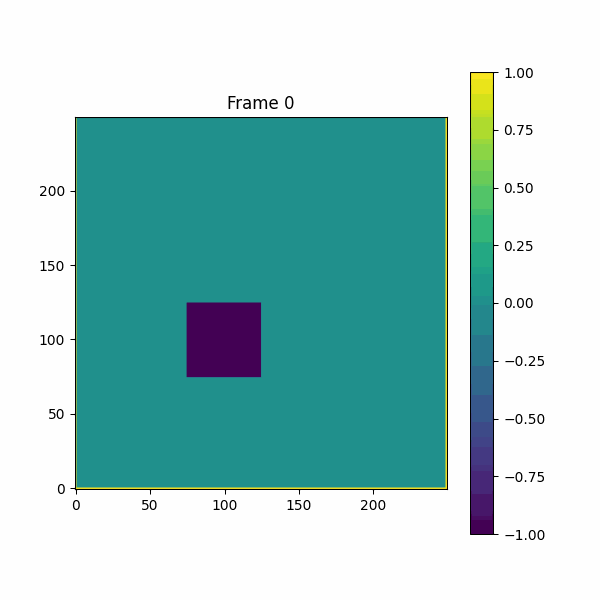

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import display, Image

def Alpha(M, V, G, up, down):
    phi = np.zeros([G, M, M])
    phi[:, 0, :] = V
    phi[:, M - 1, :] = V
    phi[:, :, 0] = V
    phi[:, :, M - 1] = V

    phi[:, up:down, up:down] = -V
    phiprime = np.empty([G, M, M], float)

    phiprime[:, 0, :] = phi[:, 0, :]
    phiprime[:, M - 1, :] = phi[:, M - 1, :]
    phiprime[:, :, 0] = phi[:, :, 0]
    phiprime[:, :, M - 1] = phi[:, :, M - 1]
    phiprime[:, up:down, up:down] = phi[:, up:down, up:down]
    return phi, phiprime

def Beta(phi, phiprime, Dom, frames, up, down):
    for i in range(frames):
        phiprime = (np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) + np.roll(phi, 1, axis=2) + np.roll(phi, -1, axis=2)) / 4
        phiprime[i, 0, :] = phi[i, 0, :]
        phiprime[i, Dom - 1, :] = phi[i, Dom - 1, :]
        phiprime[i, :, 0] = phi[i, :, 0]
        phiprime[i, :, Dom - 1] = phi[i, :, Dom - 1]
        phiprime[i, up:down, up:down] = phi[i, up:down, up:down]
        if i == frames-1:
            return phi, phiprime
        phi[i+1, :, :] = phiprime[i, :, :]
        phiprime[i+1, :, :] = phi[i, :, :]
    return phi, phiprime

def save_gif(phi, filename="BabyV^2.gif"):
    frames = []
    for i in range(phi.shape[0]):
        plt.figure(figsize=(6, 6))
        plt.imshow(phi[i], cmap='viridis', origin='lower')
        plt.colorbar()
        plt.title(f"Frame {i}")
        plt.savefig(f"frame_{i}.png")
        plt.close()
        frames.append(imageio.imread(f"frame_{i}.png"))
    imageio.mimsave(filename, frames, duration=0.0001)
    print(f"GIF saved as {filename}")
    display(Image(filename))

#Parâmetros
Potencial = 1.0
Dominio = int(input("Digite a dimensão da matriz desejada: "))
Frame = int(input("Digite o número de frames do GIF: "))
UP = int(input("Digite a diagonal inicial do quadradro: "))
Down = int(input("Digite a diagonal final do quadradro: "))

#Execução
phi, phiprime = Alpha(Dominio, Potencial, Frame, UP, Down)
phi, phiprime = Beta(phi, phiprime, Dominio, Frame, UP, Down)

#Salvar o GIF
save_gif(phi)
